<img src="http://boutiques.github.io/images/logo.png" alt="logo" width="80" align="left" style="padding:5px;"/>

# Boutiques tutorial

This tutorial will walk you through the main features of Boutiques tools. While Boutiques enables a descriptive representation of command-line utilities and informs users of their usage, the Boutiques Python tool provides users with functionality to perform a variety of operations on these descriptors. More information and documentation is available at http://github.com/boutiques.

## Getting Started

Boutiques is available as a Python module on `pip` and can be installed by simply typing `pip install boutiques`. Once Boutiques is installed, the Python and command-line APIs for Boutiques can be accessed through your new favourite command, _bosh_. The Boutiques Shell (bosh) provides an access point to all of the tools wrapped within Boutiques and has some --help text to keep you moving forward if you feel like you're getting stuck. You can check that it's correctly installed by simply typing `bosh version` in a command line:

In [1]:
! bosh version

0.5.20.post1


Help is available through `--help`:

In [2]:
! bosh --help

usage: bosh [--help]
            [{create,data,evaluate,example,exec,export,import,invocation,pprint,publish,pull,search,test,validate,version}]

positional arguments:
  {create,data,evaluate,example,exec,export,import,invocation,pprint,publish,pull,search,test,validate,version}
                        
                                       BOUTIQUES COMMANDS
                        
                        TOOL CREATION
                        * create: create a Boutiques descriptor from scratch.
                        * export: export a descriptor to other formats.
                        * import: create a descriptor for a BIDS app or update a descriptor from \
                            an older version of the schema.
                        * validate: validate an existing boutiques descriptor.
                        
                        TOOL USAGE & EXECUTION
                        * example: generate example command-line for descriptor.
                        * pprint:

_bosh_ commands are also available as a Python API, where command-line parameters are simply passed as a list:

In [3]:
from boutiques import bosh
bosh(["version"])

'0.5.20.post1'

A more Pythonic API is also available [here](http://todo.docs).

## Finding tools

Perhaps someone has already described the tool you are looking for and you could reuse their work. For instance, if you are looking for a tool that does brain extraction (bet), try:

In [4]:
bosh(["search", "bet"])

[ INFO ] Showing 1 of 1 results.


[OrderedDict([('ID', 'zenodo.1482743'),
              ('TITLE', 'fsl_bet'),
              ('DESCRIPTION', 'Automated brain extraction tool for FSL'),
              ('DOWNLOADS', 23.0)])]

The _search_ command returns a list of identifiers for tools matching your query. You can use these identifiers in any bosh command transparently. Even better, these identifiers are [Digital Object Identifiers](https://www.doi.org) hosted on [Zenodo](http://zenodo.org), they will never change and can't be deleted!

Once you have identified candidate tools for your task, you can get more details using bosh _pprint_:

In [5]:
help_text = bosh(["pprint", "zenodo.1482743"])
print(help_text[:500])  # The Python API should be documented using docstrings, so that help(bosh) returns something meaningful


Tool name: fsl_bet (ver: 1.0.0)
Tool description: Automated brain extraction tool for FSL
Tags: domain: neuroinformatics, mri

Command-line:
  bet [INPUT_FILE] [MASK] [FRACTIONAL_INTENSITY] [VERTICAL_GRADIENT]
      [CENTER_OF_GRAVITY] [OVERLAY_FLAG] [BINARY_MASK_FLAG]
      [APPROX_SKULL_FLAG] [NO_SEG_OUTPUT_FLAG] [VTK_VIEW_FLAG]
      [HEAD_RADIUS] [THRESHOLDING_FLAG] [ROBUST_ITERS_FLAG]
      [RES_OPTIC_CLEANUP_


Behind the scene, _bosh_ has downloaded the tool descriptor from Zenodo and has stored it in `~/.cache/boutiques` on your computer:

In [6]:
! head ~/.cache/boutiques/zenodo-1482743.json

{
    "tool-version": "1.0.0", 
    "name": "fsl_bet", 
    "author": "Oxford Centre for Functional MRI of the Brain (FMRIB)",
    "descriptor-url": "https://github.com/aces/cbrain-plugins-neuro/blob/master/cbrain_task_descriptors/fsl_bet.json",
    "command-line": "bet [INPUT_FILE] [MASK] [FRACTIONAL_INTENSITY] [VERTICAL_GRADIENT] [CENTER_OF_GRAVITY] [OVERLAY_FLAG] [BINARY_MASK_FLAG] [APPROX_SKULL_FLAG] [NO_SEG_OUTPUT_FLAG] [VTK_VIEW_FLAG] [HEAD_RADIUS] [THRESHOLDING_FLAG] [ROBUST_ITERS_FLAG] [RES_OPTIC_CLEANUP_FLAG] [REDUCE_BIAS_FLAG] [SLICE_PADDING_FLAG] [MASK_WHOLE_SET_FLAG] [ADD_SURFACES_FLAG] [ADD_SURFACES_T2] [VERBOSE_FLAG] [DEBUG_FLAG]", 
    "container-image": {
        "image": "mcin/docker-fsl:latest", 
        "index": "index.docker.io", 
        "type": "docker"


You can use file paths or Zenodo IDs indifferently in all _bosh_ commands. This can be useful when you work offline. For instance:

In [7]:
import os
home = os.path.expanduser('~')
help_bet = bosh(["pprint", os.path.join(home, ".cache/boutiques/zenodo-1482743.json")])
print(help_bet[:500])


Tool name: fsl_bet (ver: 1.0.0)
Tool description: Automated brain extraction tool for FSL
Tags: domain: neuroinformatics, mri

Command-line:
  bet [INPUT_FILE] [MASK] [FRACTIONAL_INTENSITY] [VERTICAL_GRADIENT]
      [CENTER_OF_GRAVITY] [OVERLAY_FLAG] [BINARY_MASK_FLAG]
      [APPROX_SKULL_FLAG] [NO_SEG_OUTPUT_FLAG] [VTK_VIEW_FLAG]
      [HEAD_RADIUS] [THRESHOLDING_FLAG] [ROBUST_ITERS_FLAG]
      [RES_OPTIC_CLEANUP_


## Using tools

It looks like we have found a tool that suits our needs -- now it's time to put it to work! The first step is to create an _invocation_ with your input values. We will use the test data in `data`:

In [8]:
from niwidgets import NiftiWidget
my_widget = NiftiWidget('./data/test.nii.gz')
my_widget.nifti_plotter(colormap='gray')

/home/glatard/venvs/spark/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/glatard/venvs/spark/lib/python3.7/site-packages/niwidgets/niwidget_volume.py:197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  else np.fliplr(np.flipud(np.rot90(data[slice_obj], k=1)))
/home/glatard/venvs/spark/lib/python3.7/site-packages/niwidgets/niwidget_volume.py:196: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an arr

<Figure size 1500x500 with 3 Axes>

The _example_ command will create a minimal invocation for you:

In [9]:
import simplejson as json
example_invocation = json.loads(bosh(["example", "zenodo.1482743"]))  # bosh example should return a JSON object, not a string
print(example_invocation)

{'infile': 'f_infile_59.csv', 'maskfile': 'str_maskfile_Cy'}


If you feel like starting with a more complete set of options, you can pass `--complete` to the _example_ command:

In [10]:
print(bosh(["example", "--complete", "zenodo.1482743"]))

{
    "approx_skull_flag": false,
    "binary_mask_flag": false,
    "center_of_gravity": [
        -34.454,
        -33.64,
        -23.883
    ],
    "debug_flag": false,
    "fractional_intensity": 0.05,
    "head_radius": 30.886,
    "infile": "f_infile_96.tex",
    "maskfile": "str_maskfile_kO",
    "no_seg_output_flag": false,
    "overlay_flag": true,
    "robust_iters_flag": true,
    "thresholding_flag": false,
    "verbose_flag": true,
    "vg_fractional_intensity": -0.388,
    "vtk_mesh": false
}


You can now edit the example invocation to add your input values:

In [11]:
example_invocation['infile']='./data/test.nii.gz'
example_invocation['maskfile']='test_brain.nii.gz'

You are now all set to use the _exec_ command to launch an analysis. One catch: we assume you have Docker or Singularity installed. A fair assumption, nowadays? We hope so:

In [12]:
output = bosh(["exec", "launch", "zenodo.1482743", json.dumps(example_invocation)])  # bosh exec launch should support invocations passed as dictionaries

You can check that the output file was created as expected:

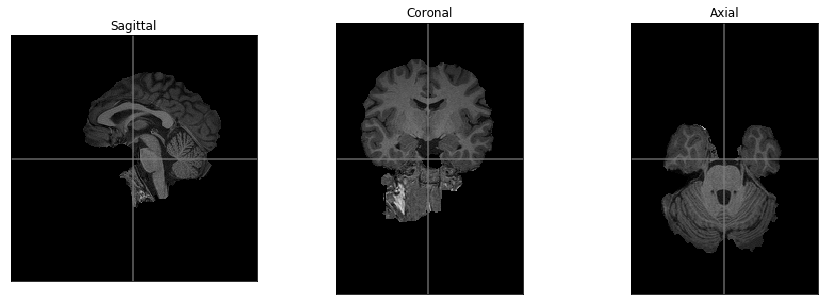

In [13]:
from niwidgets import NiftiWidget
my_widget = NiftiWidget('./test_brain.nii.gz')
my_widget.nifti_plotter(colormap='gray')

The object returned by _bosh_ contains more information about the execution:

In [14]:
print(output)

Shell command
bet ./data/test.nii.gz test_brain.nii.gz                   
Container location
Pulled from Docker
Container command
docker run --entrypoint=/bin/sh --rm  -v /home/glatard/code/boutiques-tutorial/notebooks:/home/glatard/code/boutiques-tutorial/notebooks -w /home/glatard/code/boutiques-tutorial/notebooks mcin/docker-fsl:latest /home/glatard/code/boutiques-tutorial/notebooks/temp-96074146312-1559841841128.localExec.boshjob.sh
Exit code
0
Error message

Output files

Missing files




To better integrate with Python programs, _descriptor2func_ can generate Python functions from descriptors:

In [15]:
from boutiques.descriptor2func import function
fslbet = function("zenodo.1482743")
out = fslbet(infile="./data/test.nii.gz", maskfile="test_brain.nii.gz")

You now have a Python API for Boutiques tools, irrespective of their original programming language!

## Chaining tools

Boutiques doesn't prescribe any pipeline language or engine. Feel free to use whichever you want! In its simplest form, _descriptor2func_ makes it easy to chain tools in a Python program:

In [16]:
from boutiques.descriptor2func import function
fslbet = function("zenodo.1482743")
fslstats = function("zenodo.3240521")
bet_out = fslbet(infile="./data/test.nii.gz", maskfile="test_brain.nii.gz")
stats_out = fslstats(input_file="test_brain.nii.gz", v=True)
! cat output.txt

11534336 11534336.000000 


TODOs
* test in use tools
* conclusion on FAIR
* Section on producing tools: merge existing notebook in this one
* Update README.md to point to this tutorial
* Add to neurolibre
* Move to "boutiques-tutorial" repo in boutiques
* add clowdr, nipype, spark to chaining tools